<a href="https://colab.research.google.com/github/sahilfaizal01/Detectron2/blob/main/Detectron2_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Validation Path**

In [3]:
val_img_path = '/content/drive/My Drive/Dataset/valid'
val_annotation_path = '/content/drive/My Drive/Dataset/valid/test.coco.json'

# **Installing Detectron2**

In [4]:
!python -m pip install pyyaml==5.1
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 8.1 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=eecd838d72b64f6c8411ae9e436cf8296a7e1ba951e441a392b356bf4efaca2b
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-5hbmawmi
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-5hbmawmi
     |████████████████████████████████| 50 kB 4.0 MB/s 
     |████████████████████████████████| 79 kB 

# **Importing Libraries**

In [5]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
torch:  1.11 ; cuda:  cu113
detectron2: 0.6


In [6]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# **Loading Weights**

In [33]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml'))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 # Set threshold for this model
cfg.MODEL.WEIGHTS = "/content/drive/My Drive/Dataset/output/model_final.pth" # Set path model .pth
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2
predictor = DefaultPredictor(cfg)

[06/07 14:31:59 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

# **Evaluation on Validation Set**

In [32]:
#from detectron2.utils.visualizer import ColorMode
#for d in random.sample(test_data_dicts, 4):    
 #   im = cv2.imread(d["file_name"])
  #  outputs = predictor(im)  
   # v = Visualizer(im[:, :, ::-1],
    #               metadata=my_dataset_test_metadata, 
     #              scale=0.5 
    #)
    #out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    #cv2_imshow(out.get_image()[:, :, ::-1])

# **Testing on New Images**

In [25]:
img1 = '/content/drive/My Drive/Dataset/testing/Afternoon_Bright_Video_6092.jpg'
img2 = '/content/drive/My Drive/Dataset/testing/Afternoon_Bright_Video_6093.jpg'
img3 = '/content/drive/My Drive/Dataset/testing/Afternoon_Bright_Video_6673.jpg'
img4 = '/content/drive/My Drive/Dataset/testing/Evening_Without_Shades_75401.jpg'
img5 = '/content/drive/My Drive/Dataset/testing/Evening_Without_Shades_76271.jpg'
img6 = '/content/drive/My Drive/Dataset/testing/Evening_Without_Shades_78301.jpg'

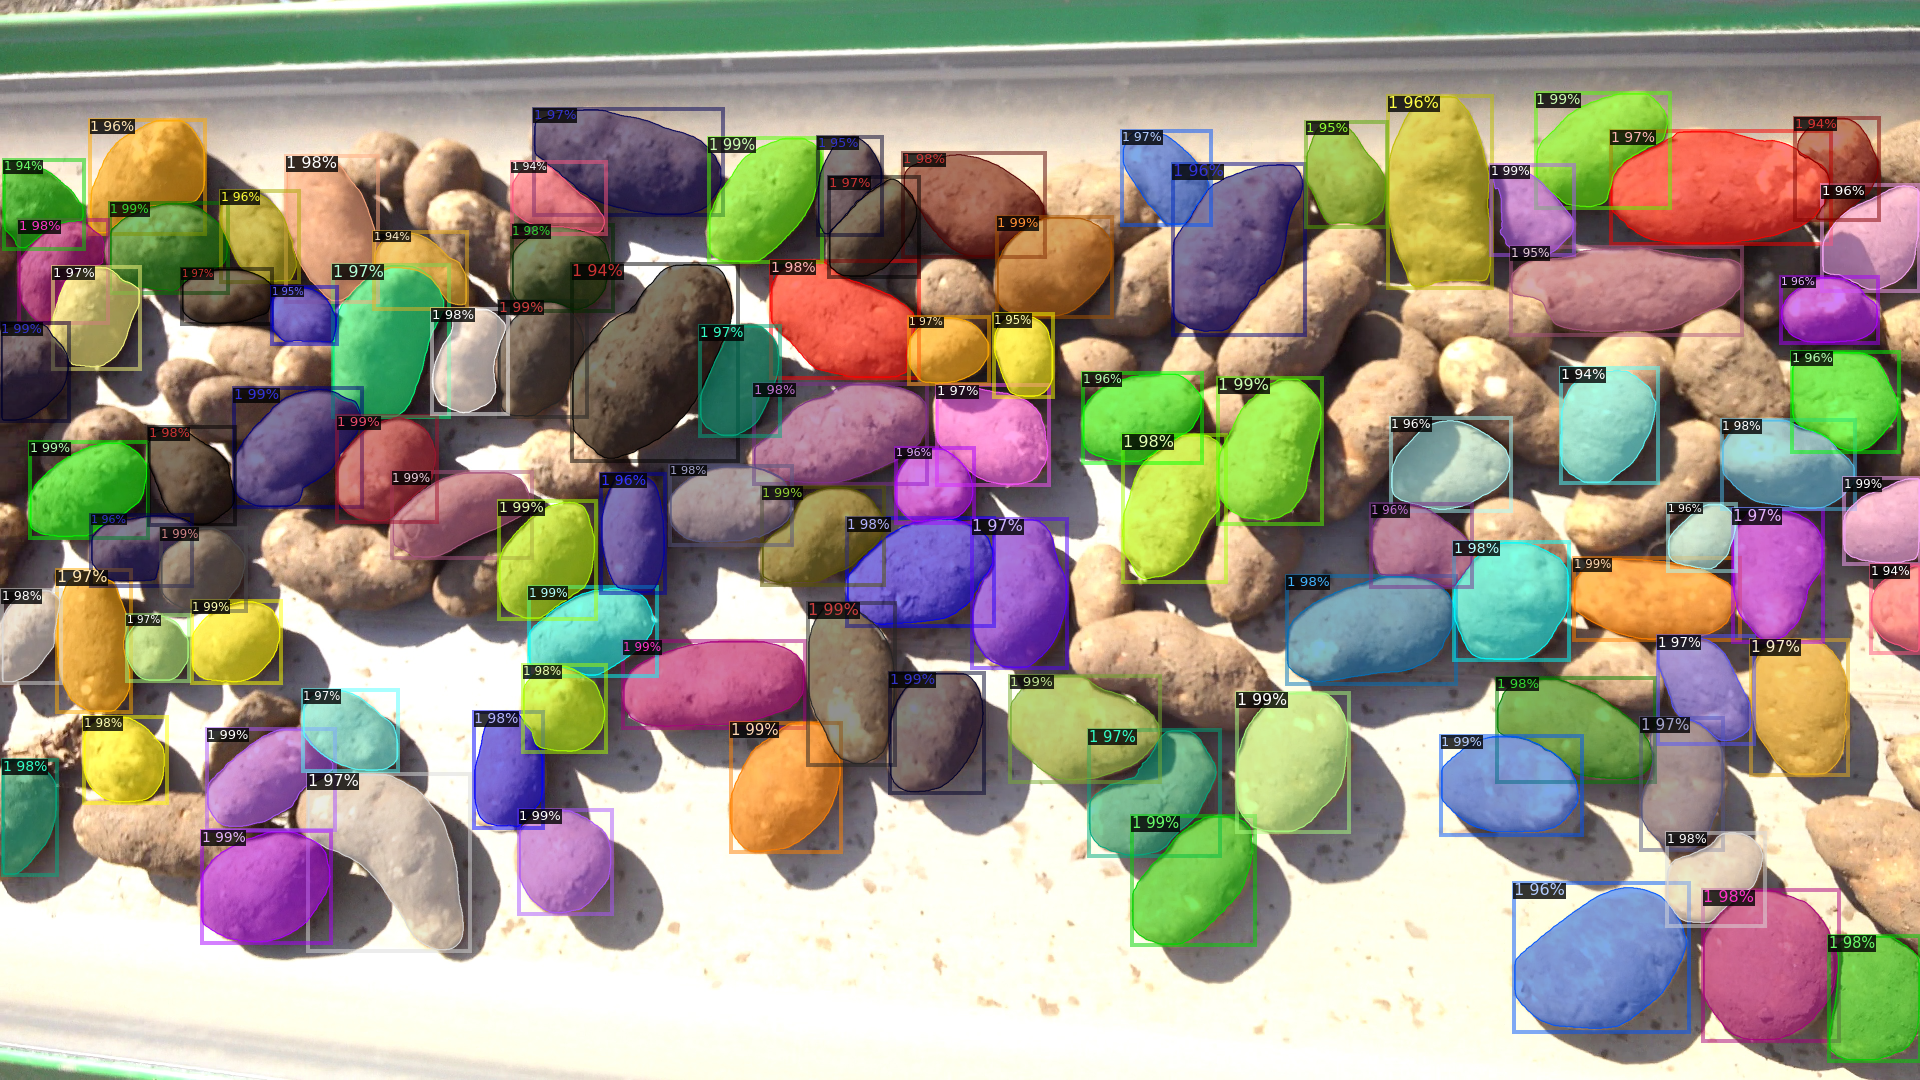

In [31]:
from detectron2.utils.visualizer import ColorMode

im = cv2.imread(img1)
outputs = predictor(im)  
v = Visualizer(im[:, :, ::-1],
                   scale=0.5 
    )
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

# **Generating Masks**

In [ ]:
 
mask_array = outputs['instances'].pred_masks.to("cpu").numpy()
num_instances = mask_array.shape[0]
scores = outputs['instances'].scores.to("cpu").numpy()
labels = outputs['instances'].pred_classes .to("cpu").numpy()

mask_array = np.moveaxis(mask_array, 0, -1)

mask_array_instance = []
h = im.shape[0]
w = im.shape[1]
img_mask = np.zeros([h, w, 3], np.uint8)
color = (200, 100, 255)
roi = outputs['instances'].get('pred_boxes')
for i in range(num_instances):
    img = np.zeros_like(im)
    mask_array_instance.append(mask_array[:, :, i:(i+1)])
    img = np.where(mask_array_instance[i] == True, 255, img)
    array_img = np.asarray(img)
    shape = [(roi[i].tensor.cpu().numpy()[0][0], roi[i].tensor.cpu().numpy()[0][1]), (roi[i].tensor.cpu().numpy()[0][2], roi[i].tensor.cpu().numpy()[0][3])]
    image = Image.fromarray(array_img)
    img1 = ImageDraw.Draw(image)
    img1.rectangle(shape, outline="green")
    image.save("{i}.png".format(i=i))